在该notebook中，我们探究如何预测RB价格月度环比，以及由预测结果测试一些基本策略。

# Part 1. 预测RB价格月度环比

- 构建领先增长率因子组合
- 训练神经网络

In [1]:
year_range = [2011, 2021] # 研究的年份区间

%run 库.ipynb  # 包含一切的包

## 1.1. 月度绝对量因子数据

In [2]:
RBMacro.rename(columns={'Open_filter_x':'RB', 
                        'Open_filter_y':'J'}, inplace=True)
RBMacro

,year,month,RB,J,库存,冰箱,空调,洗衣机,汽车,商品房月成交面积,商品房月成交套数,M0,M1,M2,中债国债到期收益率,社会融资规模
0,2011.0,4.0,4874.0,2326.0,674.07120,853.2,1761.2,590.2,156.5,221.976761,21821.00,45489.03,266766.91,757384.56,3.870908,13673.0
1,2011.0,5.0,4834.0,2356.0,601.80985,857.3,1628.8,517.5,142.6,293.890925,28259.80,44602.83,269289.63,763409.22,3.834906,10854.0
2,2011.0,6.0,4764.0,2308.0,564.54285,883.4,1604.0,485.7,148.5,281.290865,27145.25,44477.80,274662.57,780820.85,3.889845,10873.0
3,2011.0,7.0,4888.0,2280.0,554.87952,885.6,1329.0,473.6,131.8,302.068918,28876.60,45183.10,270545.65,772923.65,4.068655,5393.0
4,2011.0,8.0,4819.0,2221.0,552.90020,759.1,1119.1,559.7,145.0,280.113862,26600.25,45775.29,273393.77,780852.30,4.051022,10741.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2020.0,9.0,3578.0,2004.0,882.98750,935.8,1714.1,799.2,246.1,410.520442,38730.00,82370.87,602312.12,2164084.80,3.155527,34693.0
114,2020.0,10.0,3695.0,2228.0,762.30000,879.6,1448.9,840.6,248.1,352.948343,33354.50,81036.43,609182.41,2149720.42,3.181670,13929.0
115,2020.0,11.0,3907.0,2431.0,524.51750,898.9,1771.6,856.6,278.3,407.458181,39022.60,81593.61,618632.17,2172002.55,3.282766,21355.0
116,2020.0,12.0,4328.0,2820.0,384.23800,796.4,2152.5,806.4,280.4,449.743481,42898.25,84314.53,625580.99,2186795.89,3.153715,17192.0


## 1.2. 「RB价格月度环比增长率」与「各绝对量因子滞后趋势」之间的相关性

- 行（“回～”）：趋势长度。例：“回2”指2个月的因子叠加增长率。
- 列（“滞后～”）：滞后长度。例：“滞后2”指因子增长率相对于RB环比滞后2个月。

再例：对于6月RB环比增长率，“回2滞后2”指3月和4月的因子叠加增长率。

对于14个因子中的每一个因子，计算12“回”$\times$12“滞后”的相关性矩阵，用绿色标出最大正相关性位置，用红色标出最小负相关性位置。

In [3]:
corrMatrix('RB', 'RB', 12).style \
    .highlight_max(color = 'lightgreen', axis = None) \
    .highlight_min(color = 'pink', axis = None)

,lag 1,lag 2,lag 3,lag 4,lag 5,lag 6,lag 7,lag 8,lag 9,lag 10,lag 11,lag 12
len 1,0.174095,-0.128813,0.101808,-0.008444,-0.085451,0.090675,0.124574,0.144488,0.087436,0.113624,0.117888,0.006747
len 2,0.016936,-0.019407,0.071006,-0.066993,-0.008462,0.140167,0.178375,0.146785,0.134716,0.151714,0.081322,0.012975
len 3,0.062653,-0.021200,-0.000590,-0.016047,0.061020,0.196987,0.198900,0.187455,0.173600,0.133146,0.075060,-0.030131
len 4,0.045941,-0.075209,0.039572,0.049776,0.122452,0.212001,0.229681,0.210860,0.153034,0.122405,0.029297,-0.108733
len 5,-0.010310,-0.028839,0.091890,0.107190,0.146260,0.239034,0.249793,0.194254,0.145491,0.076356,-0.049212,-0.134621
len 6,0.014908,0.024143,0.145407,0.131708,0.183689,0.267923,0.239666,0.185530,0.101630,-0.010594,-0.084190,-0.098934
len 7,0.067696,0.075433,0.164105,0.173820,0.220736,0.256380,0.221500,0.135504,0.013614,-0.050548,-0.052420,-0.043937
len 8,0.112920,0.093703,0.198219,0.202735,0.205434,0.236981,0.168628,0.053912,-0.021194,-0.026103,-0.005627,-0.018288
len 9,0.124925,0.128791,0.221633,0.182216,0.187433,0.187204,0.089721,0.020608,0.000752,0.010335,0.013537,-0.013288
len 10,0.157329,0.155254,0.201424,0.161388,0.141715,0.117553,0.053971,0.036471,0.036549,0.025493,0.013460,-0.034645


In [4]:
corrMatrix('RB', 'J', 12).style \
    .highlight_max(color = 'lightgreen', axis = None) \
    .highlight_min(color = 'pink', axis = None)

,lag 1,lag 2,lag 3,lag 4,lag 5,lag 6,lag 7,lag 8,lag 9,lag 10,lag 11,lag 12
len 1,0.089679,0.041444,0.181072,0.026655,-0.023682,0.065943,0.041290,0.093090,0.114290,0.219153,0.061365,-0.115751
len 2,0.070861,0.137948,0.150928,0.009196,0.010191,0.070219,0.086956,0.125374,0.218699,0.183087,-0.028812,-0.058595
len 3,0.141491,0.137884,0.124102,0.030385,0.025336,0.099431,0.116679,0.220494,0.220636,0.097848,-0.016290,-0.049301
len 4,0.148497,0.110186,0.127644,0.046701,0.051220,0.122491,0.206054,0.223277,0.143815,0.090124,-0.021293,-0.065117
len 5,0.120767,0.115553,0.139079,0.070286,0.078339,0.200605,0.212279,0.157351,0.136834,0.069453,-0.042631,-0.051645
len 6,0.120259,0.134414,0.161392,0.095821,0.165472,0.210310,0.147753,0.148456,0.116232,0.037907,-0.026612,-0.042982
len 7,0.147005,0.149051,0.178508,0.179613,0.173255,0.146234,0.129543,0.125266,0.090741,0.048730,-0.018836,-0.013804
len 8,0.159367,0.160060,0.237638,0.179157,0.112876,0.126095,0.109064,0.107303,0.096308,0.047605,0.004676,-0.000849
len 9,0.171868,0.215329,0.234659,0.122944,0.097776,0.106473,0.092961,0.113450,0.092381,0.060349,0.010915,-0.036097
len 10,0.226142,0.212955,0.178423,0.109489,0.082109,0.088526,0.096865,0.109418,0.104335,0.062691,-0.023109,-0.030808


In [5]:
corrMatrix('RB', '库存', 12).style \
    .highlight_max(color = 'lightgreen', axis = None) \
    .highlight_min(color = 'pink', axis = None)

,lag 1,lag 2,lag 3,lag 4,lag 5,lag 6,lag 7,lag 8,lag 9,lag 10,lag 11,lag 12
len 1,-0.141994,-0.090099,-0.000977,0.203861,0.136910,-0.125124,-0.259448,-0.082705,0.138583,0.149087,0.184538,0.066074
len 2,-0.124549,-0.033323,0.109870,0.184990,0.011236,-0.214356,-0.180844,0.026760,0.154208,0.195489,0.133171,-0.060614
len 3,-0.076790,0.051224,0.135184,0.108857,-0.102608,-0.206066,-0.082268,0.079190,0.211569,0.169075,0.043153,-0.103707
len 4,-0.007472,0.082717,0.097534,0.000653,-0.145440,-0.142427,-0.018379,0.165913,0.214164,0.103576,-0.012683,-0.119075
len 5,0.016114,0.042792,-0.003298,-0.048893,-0.096284,-0.087029,0.065817,0.188062,0.160734,0.059494,-0.037465,-0.084554
len 6,-0.039939,-0.069177,-0.047500,0.010705,-0.029523,-0.003646,0.080733,0.120750,0.117119,0.038737,0.002453,-0.031131
len 7,-0.158208,-0.108024,0.026604,0.084118,0.068488,0.014134,-0.001880,0.060508,0.096593,0.080027,0.061587,-0.059887
len 8,-0.186555,-0.024284,0.098786,0.179270,0.085071,-0.068813,-0.060955,0.035315,0.133102,0.140904,0.036865,-0.158127
len 9,-0.105314,0.049660,0.194404,0.195019,0.004073,-0.126101,-0.081610,0.073231,0.203046,0.127014,-0.065456,-0.169038
len 10,-0.039753,0.148623,0.222319,0.131296,-0.058770,-0.154589,-0.037968,0.156944,0.211621,0.036887,-0.097990,-0.155462


In [6]:
corrMatrix('RB', '冰箱', 12).style \
    .highlight_max(color = 'lightgreen', axis = None) \
    .highlight_min(color = 'pink', axis = None)

,lag 1,lag 2,lag 3,lag 4,lag 5,lag 6,lag 7,lag 8,lag 9,lag 10,lag 11,lag 12
len 1,0.032432,-0.033134,-0.023788,-0.137289,0.051024,0.024508,-0.018207,-0.093745,0.104612,0.171674,0.035338,0.067413
len 2,0.000965,-0.033479,-0.124993,-0.073445,0.050887,0.006954,-0.091042,0.014250,0.204745,0.162386,0.088157,0.075750
len 3,-0.002365,-0.116891,-0.068621,-0.051684,0.043752,-0.053460,-0.008046,0.129391,0.212384,0.201798,0.101253,-0.120120
len 4,-0.093335,-0.073130,-0.048403,-0.041319,-0.020406,0.018183,0.105240,0.147658,0.243450,0.201603,-0.089392,-0.061734
len 5,-0.061970,-0.063857,-0.042360,-0.087722,0.045035,0.119002,0.123861,0.176912,0.235075,0.030017,-0.060239,-0.016851
len 6,-0.050209,-0.051778,-0.092221,-0.021028,0.150764,0.142876,0.157097,0.185161,0.074221,0.048233,-0.019765,-0.102743
len 7,-0.041199,-0.104376,-0.031495,0.083835,0.173669,0.172187,0.166770,0.033060,0.081298,0.064063,-0.093164,-0.170856
len 8,-0.094200,-0.051800,0.076021,0.118292,0.226377,0.198455,0.028238,0.043061,0.092753,-0.006144,-0.163081,-0.053479
len 9,-0.023728,0.076637,0.113653,0.166240,0.261783,0.037627,0.049099,0.063307,0.018920,-0.079164,-0.033983,0.079936
len 10,0.111203,0.112259,0.156253,0.181872,0.100583,0.062169,0.062656,-0.021279,-0.056032,0.074102,0.110438,0.009448


In [7]:
corrMatrix('RB', '空调', 12).style \
    .highlight_max(color = 'lightgreen', axis = None) \
    .highlight_min(color = 'pink', axis = None)

,lag 1,lag 2,lag 3,lag 4,lag 5,lag 6,lag 7,lag 8,lag 9,lag 10,lag 11,lag 12
len 1,0.151008,0.021680,-0.076813,-0.028234,0.014010,-0.093390,0.016972,-0.070419,-0.014089,0.156122,0.044636,0.060614
len 2,0.106896,-0.038087,-0.076092,-0.026158,-0.044157,-0.036122,-0.044608,-0.067516,0.095957,0.144906,0.070954,0.111952
len 3,0.063109,-0.049634,-0.068266,-0.069569,-0.009589,-0.067484,-0.052338,0.048507,0.117921,0.149484,0.109048,-0.038127
len 4,0.040153,-0.049532,-0.115120,-0.034358,-0.046974,-0.078708,0.054288,0.080465,0.132633,0.181042,-0.016201,-0.065868
len 5,0.031678,-0.097412,-0.078132,-0.064221,-0.064077,0.004020,0.070215,0.092668,0.172620,0.087758,-0.062000,-0.028356
len 6,-0.020484,-0.069590,-0.105490,-0.074545,0.015685,0.016931,0.082719,0.140699,0.092201,0.024828,-0.043728,-0.068814
len 7,0.006310,-0.093603,-0.125882,0.008959,0.035464,0.016114,0.130271,0.075631,0.024975,0.016442,-0.072294,-0.136966
len 8,-0.003196,-0.114511,-0.047829,0.029713,0.035289,0.070560,0.075037,0.014337,0.011757,-0.006657,-0.148662,-0.073159
len 9,-0.012738,-0.020816,-0.027905,0.027668,0.098523,0.006377,0.024356,0.014598,-0.019370,-0.093977,-0.091962,0.030482
len 10,0.116737,0.016447,-0.027162,0.096650,0.019925,-0.041356,0.028961,-0.031076,-0.137118,-0.004832,0.049125,-0.037082


In [8]:
corrMatrix('RB', '洗衣机', 12).style \
    .highlight_max(color = 'lightgreen', axis = None) \
    .highlight_min(color = 'pink', axis = None)

,lag 1,lag 2,lag 3,lag 4,lag 5,lag 6,lag 7,lag 8,lag 9,lag 10,lag 11,lag 12
len 1,-0.002345,-0.028312,-0.017131,0.012407,0.083220,-0.057094,0.037901,-0.079465,-0.006562,0.126173,0.029915,-0.051413
len 2,-0.015478,-0.022865,-0.011602,0.060280,0.025968,0.003916,-0.023135,-0.087063,0.107783,0.137791,-0.029457,-0.064669
len 3,-0.000991,-0.014636,0.067075,0.028325,0.094133,-0.032702,-0.033818,0.044782,0.120472,0.058718,-0.067839,-0.180092
len 4,0.007380,0.051863,0.032445,0.089823,0.044945,-0.042348,0.088097,0.058245,0.055613,0.021561,-0.175781,-0.149224
len 5,0.082979,0.025346,0.079744,0.038038,0.034723,0.072805,0.109790,0.000793,0.024694,-0.072200,-0.142707,0.044313
len 6,0.070018,0.080993,0.029494,0.020226,0.152445,0.099356,0.061411,-0.016543,-0.091905,-0.023179,0.074464,0.001975
len 7,0.102214,0.016132,0.015884,0.135000,0.157318,0.050622,0.051277,-0.136133,-0.014918,0.186072,0.022605,-0.176644
len 8,0.066828,-0.000843,0.136029,0.155349,0.115815,0.026821,-0.062007,-0.098770,0.184546,0.153365,-0.136314,-0.088889
len 9,0.054619,0.128791,0.140357,0.116855,0.098846,-0.120218,-0.036905,0.140128,0.136645,-0.042927,-0.041552,0.091583
len 10,0.174874,0.141221,0.094556,0.088879,-0.041827,-0.095019,0.164418,0.098002,-0.052598,0.065269,0.171106,-0.022160


In [9]:
corrMatrix('RB', '汽车', 12).style \
    .highlight_max(color = 'lightgreen', axis = None) \
    .highlight_min(color = 'pink', axis = None)

,lag 1,lag 2,lag 3,lag 4,lag 5,lag 6,lag 7,lag 8,lag 9,lag 10,lag 11,lag 12
len 1,0.047996,0.096868,0.045135,0.040187,0.042805,-0.187215,0.050632,0.093650,-0.027529,0.103408,-0.010825,-0.081488
len 2,0.119148,0.127100,0.063702,0.053873,-0.106780,-0.094392,0.115099,0.045791,0.064910,0.074332,-0.076741,0.013824
len 3,0.147915,0.145077,0.088120,-0.077057,-0.045697,-0.014499,0.085329,0.139480,0.033782,-0.016603,-0.002681,-0.017238
len 4,0.155959,0.147879,-0.040206,-0.029170,0.018323,-0.031283,0.160770,0.095463,-0.041365,0.036678,-0.017614,-0.025254
len 5,0.174759,0.034254,-0.008165,0.025722,-0.007240,0.049013,0.123503,0.023046,0.008590,0.035710,-0.039409,0.014117
len 6,0.078999,0.062690,0.048654,-0.006944,0.069119,0.012705,0.061723,0.085820,-0.000611,0.017057,0.010194,0.027191
len 7,0.102141,0.105640,0.014480,0.065361,0.027171,-0.058711,0.117939,0.059902,-0.011735,0.065420,0.031821,-0.139929
len 8,0.149869,0.064661,0.087536,0.041112,-0.033620,0.004874,0.087568,0.060062,0.045850,0.088077,-0.142485,-0.145266
len 9,0.120568,0.150068,0.058773,-0.019553,0.041652,-0.047131,0.098238,0.149011,0.060923,-0.108326,-0.144843,-0.054410
len 10,0.201973,0.125263,-0.002886,0.049634,-0.017784,-0.057615,0.172733,0.159759,-0.141160,-0.089741,-0.005191,-0.071242


In [10]:
corrMatrix('RB', '商品房月成交面积', 12).style \
    .highlight_max(color = 'lightgreen', axis = None) \
    .highlight_min(color = 'pink', axis = None)

,lag 1,lag 2,lag 3,lag 4,lag 5,lag 6,lag 7,lag 8,lag 9,lag 10,lag 11,lag 12
len 1,0.076212,-0.021259,0.090373,0.085989,-0.112686,-0.135798,0.168906,0.160674,0.101492,0.016532,0.021126,-0.255122
len 2,0.036485,0.039659,0.103373,-0.077722,-0.162419,0.101166,0.204932,0.158095,0.010392,0.031561,-0.213802,-0.180235
len 3,0.057915,0.069110,-0.058953,-0.140631,0.053012,0.162484,0.220745,0.036350,-0.008040,-0.217334,-0.182228,-0.118089
len 4,0.086450,-0.076749,-0.114978,0.053944,0.114480,0.195505,0.087347,0.051963,-0.241383,-0.180019,-0.125267,-0.055828
len 5,-0.055220,-0.135109,0.073684,0.115356,0.161710,0.067027,0.217479,-0.157862,-0.212229,-0.134823,-0.070099,0.065278
len 6,-0.121231,0.050211,0.138057,0.163849,0.039066,0.158531,0.020524,-0.137667,-0.175360,-0.093910,0.037990,-0.036472
len 7,0.072435,0.113008,0.182258,0.042169,0.059441,-0.044727,0.038537,-0.088048,-0.114179,0.030634,-0.046003,-0.142558
len 8,0.147820,0.161932,0.068886,0.079871,-0.138831,-0.028156,0.079465,-0.046097,-0.006473,-0.043928,-0.131596,0.050197
len 9,0.186803,0.036223,0.121956,-0.100455,-0.117274,0.013268,0.118902,0.047644,-0.105581,-0.136722,0.052032,0.082542
len 10,0.054437,0.052390,-0.054129,-0.096918,-0.087967,0.039268,0.196261,-0.029047,-0.176073,0.025048,0.092016,0.061611


In [11]:
corrMatrix('RB', '商品房月成交套数', 12).style \
    .highlight_max(color = 'lightgreen', axis = None) \
    .highlight_min(color = 'pink', axis = None)

,lag 1,lag 2,lag 3,lag 4,lag 5,lag 6,lag 7,lag 8,lag 9,lag 10,lag 11,lag 12
len 1,0.079263,-0.024141,0.094449,0.092318,-0.118845,-0.139609,0.168406,0.165114,0.100028,0.017848,0.018026,-0.244644
len 2,0.036492,0.041343,0.109146,-0.076000,-0.166040,0.098222,0.203795,0.158645,0.010819,0.031303,-0.212539,-0.166006
len 3,0.060341,0.073583,-0.057065,-0.140984,0.049389,0.162512,0.219306,0.036964,-0.010658,-0.213763,-0.175047,-0.108060
len 4,0.091097,-0.075007,-0.114241,0.053651,0.112180,0.192758,0.086196,0.054209,-0.240354,-0.171113,-0.119900,-0.041885
len 5,-0.053310,-0.135239,0.074327,0.115723,0.157377,0.065136,0.221538,-0.154164,-0.208184,-0.127458,-0.062886,0.070025
len 6,-0.120409,0.050118,0.139028,0.162717,0.035154,0.155554,0.025820,-0.126081,-0.173354,-0.083781,0.038918,-0.042019
len 7,0.072102,0.113022,0.182066,0.040727,0.047550,-0.044232,0.049273,-0.078651,-0.108368,0.032869,-0.056025,-0.146242
len 8,0.149537,0.160636,0.069522,0.078039,-0.148089,-0.023002,0.087516,-0.032008,-0.003112,-0.049314,-0.140248,0.051981
len 9,0.185541,0.035802,0.125519,-0.100638,-0.118788,0.016615,0.131699,0.056442,-0.112568,-0.141598,0.050195,0.084049
len 10,0.054229,0.053573,-0.048937,-0.091832,-0.091282,0.046390,0.202639,-0.028970,-0.182546,0.025316,0.092993,0.068856


In [12]:
corrMatrix('RB', 'M0', 12).style \
    .highlight_max(color = 'lightgreen', axis = None) \
    .highlight_min(color = 'pink', axis = None)

,lag 1,lag 2,lag 3,lag 4,lag 5,lag 6,lag 7,lag 8,lag 9,lag 10,lag 11,lag 12
len 1,0.049339,-0.041326,0.013181,-0.134326,0.096562,0.186219,-0.019481,-0.228807,-0.126129,0.069126,0.069784,0.060719
len 2,0.014933,-0.020600,-0.084563,-0.043021,0.209099,0.136145,-0.175242,-0.268384,-0.050871,0.104875,0.099870,0.154481
len 3,0.025507,-0.101489,-0.025851,0.075416,0.189614,-0.013643,-0.245169,-0.208892,-0.002970,0.136655,0.187721,0.107843
len 4,-0.055195,-0.045658,0.087369,0.071519,0.049723,-0.094039,-0.203755,-0.163173,0.033426,0.226804,0.150270,-0.001585
len 5,0.000747,0.062444,0.079254,-0.063717,-0.027681,-0.052509,-0.157441,-0.126706,0.120278,0.185986,0.042596,0.010701
len 6,0.106288,0.056014,-0.049825,-0.135988,0.008492,-0.014471,-0.122366,-0.037128,0.085036,0.085703,0.057296,0.023064
len 7,0.102090,-0.069779,-0.124489,-0.103321,0.046367,0.019381,-0.038402,-0.068146,-0.013552,0.098674,0.071341,0.095024
len 8,-0.026138,-0.148603,-0.093380,-0.067742,0.084304,0.109911,-0.070636,-0.169764,0.001082,0.112061,0.143194,0.105698
len 9,-0.109529,-0.116731,-0.058667,-0.028395,0.185152,0.077805,-0.169811,-0.154421,0.009978,0.190667,0.160421,-0.032919
len 10,-0.079028,-0.095319,-0.011224,0.092102,0.168437,0.006510,-0.136545,-0.173294,0.088623,0.230600,-0.010113,-0.017851


In [13]:
corrMatrix('RB', 'M1', 12).style \
    .highlight_max(color = 'lightgreen', axis = None) \
    .highlight_min(color = 'pink', axis = None)

,lag 1,lag 2,lag 3,lag 4,lag 5,lag 6,lag 7,lag 8,lag 9,lag 10,lag 11,lag 12
len 1,0.183486,0.038975,0.115191,0.020994,-0.071140,0.050705,0.208931,0.191982,-0.073450,0.077574,-0.056214,-0.027483
len 2,0.184682,0.131212,0.112058,-0.041634,-0.016659,0.214785,0.329191,0.096055,0.002469,0.018847,-0.070358,0.121509
len 3,0.259470,0.138553,0.058911,0.003927,0.142438,0.343381,0.246582,0.145605,-0.042605,-0.001705,0.067823,0.247625
len 4,0.244993,0.073025,0.085034,0.145498,0.258617,0.257013,0.273442,0.094784,-0.059331,0.113575,0.183815,0.215675
len 5,0.193213,0.104845,0.224116,0.268762,0.202733,0.303456,0.230426,0.072203,0.055170,0.230723,0.175131,0.175041
len 6,0.208505,0.237246,0.340927,0.211605,0.245150,0.256318,0.199307,0.171889,0.166954,0.204016,0.124333,0.116130
len 7,0.305077,0.318425,0.259495,0.233584,0.186166,0.211304,0.274200,0.253129,0.142011,0.151871,0.063718,0.096247
len 8,0.365874,0.244759,0.269518,0.177829,0.150770,0.272735,0.329792,0.222904,0.102096,0.092208,0.048401,0.153186
len 9,0.308031,0.268583,0.226337,0.154478,0.226454,0.340194,0.317930,0.193376,0.052408,0.078206,0.110671,0.188488
len 10,0.323849,0.229911,0.195878,0.214323,0.289140,0.307609,0.266171,0.148183,0.043957,0.129356,0.166242,0.102798


In [14]:
corrMatrix('RB', 'M2', 12).style \
    .highlight_max(color = 'lightgreen', axis = None) \
    .highlight_min(color = 'pink', axis = None)

,lag 1,lag 2,lag 3,lag 4,lag 5,lag 6,lag 7,lag 8,lag 9,lag 10,lag 11,lag 12
len 1,0.100984,-0.153756,-0.083741,-0.101927,-0.029527,-0.009468,0.029455,-0.018376,-0.101955,0.047635,0.149793,0.000830
len 2,-0.040810,-0.186212,-0.146149,-0.105850,-0.032454,0.016309,0.009122,-0.094148,-0.042254,0.154519,0.117289,0.076563
len 3,-0.093657,-0.224471,-0.133434,-0.088620,-0.009361,-0.001333,-0.063212,-0.047392,0.061663,0.134538,0.171139,0.009692
len 4,-0.132104,-0.206235,-0.119376,-0.055502,-0.018162,-0.056553,-0.025516,0.044150,0.049668,0.160259,0.093343,-0.073408
len 5,-0.141524,-0.199260,-0.095021,-0.060573,-0.067633,-0.028349,0.052260,0.040058,0.090907,0.104271,0.013142,-0.054766
len 6,-0.143271,-0.175390,-0.099396,-0.105994,-0.041894,0.045575,0.049762,0.080868,0.046679,0.030764,0.024328,-0.066463
len 7,-0.120547,-0.171315,-0.137057,-0.075447,0.023009,0.045979,0.092829,0.038250,-0.003610,0.054106,0.001355,-0.087954
len 8,-0.124937,-0.206729,-0.110008,-0.013625,0.026407,0.089327,0.054696,-0.006532,0.021861,0.031517,-0.024223,-0.081608
len 9,-0.170791,-0.185815,-0.054563,-0.005622,0.078928,0.057271,0.025393,0.030464,-0.003029,0.003419,-0.018878,-0.135283
len 10,-0.144753,-0.125774,-0.045402,0.043611,0.044082,0.023943,0.057807,0.006306,-0.029653,0.007736,-0.067315,-0.199703


In [15]:
corrMatrix('RB', '中债国债到期收益率', 12).style \
    .highlight_max(color = 'lightgreen', axis = None) \
    .highlight_min(color = 'pink', axis = None)

,lag 1,lag 2,lag 3,lag 4,lag 5,lag 6,lag 7,lag 8,lag 9,lag 10,lag 11,lag 12
len 1,0.122543,0.037886,-0.097884,-0.187482,-0.026687,0.001246,0.166561,0.084990,0.127691,-0.056581,-0.218466,-0.100355
len 2,0.101008,-0.034574,-0.174866,-0.134553,-0.016055,0.107967,0.156855,0.131048,0.041941,-0.172958,-0.203342,-0.124313
len 3,0.033948,-0.114256,-0.144721,-0.099923,0.067219,0.126368,0.180927,0.070843,-0.072729,-0.178900,-0.201379,-0.184950
len 4,-0.042939,-0.098043,-0.111013,-0.017599,0.088190,0.155685,0.127110,-0.029371,-0.095549,-0.184797,-0.244418,-0.137814
len 5,-0.038980,-0.077169,-0.038536,0.012428,0.119439,0.114616,0.032958,-0.056006,-0.116567,-0.232336,-0.203975,-0.150842
len 6,-0.030526,-0.016445,-0.006825,0.049691,0.084498,0.032139,0.002458,-0.083549,-0.168158,-0.206644,-0.217007,-0.148586
len 7,0.022951,0.010933,0.029378,0.023477,0.012524,0.003864,-0.029846,-0.130766,-0.152064,-0.222950,-0.206705,-0.117575
len 8,0.046405,0.043693,0.006052,-0.038014,-0.013256,-0.030220,-0.078369,-0.125028,-0.177726,-0.213477,-0.174474,-0.135993
len 9,0.075817,0.019920,-0.049813,-0.058640,-0.044169,-0.073796,-0.077948,-0.153888,-0.170294,-0.181550,-0.186725,-0.100455
len 10,0.051913,-0.034178,-0.069479,-0.084625,-0.083182,-0.074709,-0.108867,-0.148489,-0.143712,-0.194356,-0.152490,-0.113613


In [16]:
corrMatrix('RB', '社会融资规模', 12).style \
    .highlight_max(color = 'lightgreen', axis = None) \
    .highlight_min(color = 'pink', axis = None)

,lag 1,lag 2,lag 3,lag 4,lag 5,lag 6,lag 7,lag 8,lag 9,lag 10,lag 11,lag 12
len 1,0.060725,-0.050281,0.175111,0.074261,0.002100,-0.043149,0.065802,0.056275,-0.056242,0.066762,0.188785,-0.128416
len 2,0.145253,0.111151,0.100452,-0.080051,-0.019787,0.082693,0.044162,-0.183548,-0.079264,0.333374,0.058914,-0.071330
len 3,0.159248,0.022813,0.073308,-0.154445,0.091030,0.128461,-0.093812,-0.195077,0.147100,0.243486,0.078124,0.039288
len 4,0.185761,-0.048412,0.026350,-0.043631,0.041207,-0.058231,-0.041507,0.096176,-0.016089,0.161331,0.159960,-0.068136
len 5,0.123245,-0.056313,0.075574,-0.002787,-0.116535,-0.099173,0.140869,0.009983,0.042845,0.224325,0.084702,-0.113238
len 6,0.066368,-0.096625,0.062884,-0.130199,-0.054014,0.171109,0.025095,-0.106351,0.094598,0.155080,0.043510,0.012491
len 7,0.115605,-0.005086,-0.063584,-0.154056,0.083665,0.004343,0.102196,0.073330,-0.003335,0.171387,0.119415,-0.089772
len 8,0.127967,-0.201956,-0.056549,0.103162,0.062795,0.065372,0.123700,0.002586,-0.002459,0.212847,0.057232,-0.066814
len 9,0.010584,-0.152528,0.176467,-0.069654,0.008634,0.218310,0.086127,-0.062795,0.082685,0.181834,0.031567,0.042614
len 10,-0.030694,0.119194,0.096547,0.006133,0.115552,0.020009,0.035773,0.058969,0.033856,0.230958,0.181960,-0.257196


## 1.3. 领先增长率因子组合

对于每个矩阵中的最大正相关性与最小负相关性，若相关性绝对值大于0.2，择将相应位置的绝对量因子滞后趋势纳入领先增长率因子组合。共找出14个领先增长率因子。

In [17]:
ModelFrame = pd.DataFrame({'year': RBMacro.year.values, 
                           'month': RBMacro.month.values, 
                           'RB_mom': MOM(RBMacro.RB.values), 
                           'RB_mom_pm': to_pm(MOM(RBMacro.RB.values)), 
                           'RB+': lagging(XOX(RBMacro.RB.values, 6), 6), 
                           'J+': lagging(XOX(RBMacro.J.values, 8), 3), 
                           '库存+': lagging(XOX(RBMacro.库存.values, 10), 3), 
                           '库存-': lagging(XOX(RBMacro.库存.values, 1), 7), 
                           '冰箱+': lagging(XOX(RBMacro.冰箱.values, 12), 9), 
                           '洗衣机+': lagging(XOX(RBMacro.洗衣机.values, 12), 9), 
                           '汽车+': lagging(XOX(RBMacro.汽车.values, 10), 1), 
                           '面积+': lagging(XOX(RBMacro.商品房月成交面积.values, 3), 7), 
                           '面积-': lagging(XOX(RBMacro.商品房月成交面积.values, 1), 12), 
                           '套数+': lagging(XOX(RBMacro.商品房月成交套数.values, 5), 7), 
                           '套数-': lagging(XOX(RBMacro.商品房月成交套数.values, 1), 12), 
                           'M0+': lagging(XOX(RBMacro.M0.values, 10), 10), 
                           'M0-': lagging(XOX(RBMacro.M0.values, 2), 8), 
                           'M1+': lagging(XOX(RBMacro.M1.values, 8), 1), 
                           'M2-': lagging(XOX(RBMacro.M2.values, 3), 2), 
                           '国债-': lagging(XOX(RBMacro.中债国债到期收益率.values, 4), 11), 
                           '社融+': lagging(XOX(RBMacro.社会融资规模.values, 2), 10), 
                           '社融-': lagging(XOX(RBMacro.社会融资规模.values, 10), 12), 
                          })

In [18]:
ModelFrame.dropna(inplace = True)
ModelFrame

,year,month,RB_mom,RB_mom_pm,RB+,J+,库存+,库存-,冰箱+,洗衣机+,...,面积-,套数+,套数-,M0+,M0-,M1+,M2-,国债-,社融+,社融-
22,2013.0,2.0,-0.020930,-1.0,-0.191884,-0.226155,-0.157071,-0.008373,-0.126560,-0.037874,...,0.111882,1.260877,0.167832,0.128638,-0.018221,0.116890,0.032278,-0.010565,-0.076119,-0.237110
23,2013.0,3.0,-0.050211,-1.0,-0.178104,-0.128664,-0.378025,-0.075329,-0.030337,0.011530,...,0.598432,0.321979,0.532754,0.085355,0.013583,0.029831,0.059510,0.033339,-0.388794,0.723236
24,2013.0,4.0,-0.044491,-1.0,-0.142824,0.039109,-0.261134,-0.128741,-0.058491,0.081503,...,0.027591,0.319995,0.002813,0.076665,0.019284,0.098229,0.056908,-0.020794,0.847255,-0.113676
25,2013.0,5.0,-0.046015,-1.0,-0.123560,0.070643,0.029620,-0.038799,0.020946,-0.018581,...,0.106289,0.092456,0.119795,0.054312,0.074994,0.076675,0.063347,-0.059640,-0.079601,1.119785
26,2013.0,6.0,0.012346,1.0,-0.041462,0.010572,0.469175,-0.057941,0.017595,0.128900,...,0.119385,0.330799,0.106070,0.078483,0.024538,0.081650,0.040743,-0.066066,-0.299236,0.657388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2020.0,9.0,-0.044593,-1.0,-0.026885,0.096627,0.210518,1.019096,0.115385,0.043372,...,0.172028,-0.918998,0.192880,-0.154301,0.260570,0.043888,0.015249,0.021173,-0.207034,0.558998
114,2020.0,10.0,0.032700,1.0,0.003856,0.080978,0.557370,0.302814,-0.012369,-0.031917,...,-0.153943,-0.405001,-0.156609,-0.028877,0.142475,0.104083,0.017452,0.014399,1.536059,-0.550519
115,2020.0,11.0,0.057375,1.0,-0.006430,0.055675,0.907102,-0.151264,-0.012369,-0.031917,...,0.073375,-0.178628,0.075756,0.244291,-0.109673,0.102192,0.013647,0.029924,1.534745,-0.573917
116,2020.0,12.0,0.107755,1.0,0.021745,0.092694,1.756958,-0.239021,-0.012369,-0.031917,...,0.237801,-0.208717,0.239263,0.192269,-0.075996,0.075788,0.011415,-0.064286,-0.603098,1.277570


## 1.4. 神经网络（多层感知器）

- 训练集时间范围：2013-02至2019-01
- 测试集时间范围：2019-02至2021-01

In [19]:
traindates = pd.period_range('2013-02', '2019-01', freq='M').astype(str)
ntrain = len(traindates)
testdates = pd.period_range('2019-02', '2021-01', freq='M').astype(str)
ntest = len(testdates)

In [20]:
y_train_nnr = ModelFrame.iloc[:-ntest,2].values
X_train_nnr = ModelFrame.iloc[:-ntest,4:].values
y_test_nnr = ModelFrame.iloc[-ntest:,2].values
X_test_nnr = ModelFrame.iloc[-ntest:,4:].values

In [21]:
# hypterparameters

hidden_layer_sizes = (18, 36, 18)
max_iter = 1000  # default = 20
alpha = 0.001  # default = 0.0001
learning_rate_init = 0.0005  # default = 0.001

In [22]:
# training and out-of-sample prediction (averaging over 1000 networks)

preds = [[] for _ in range(1000)]

for rs in range(1000):
    nnr = MLPRegressor(hidden_layer_sizes = hidden_layer_sizes, 
                       max_iter = max_iter, 
                       alpha = alpha, 
                       learning_rate_init = learning_rate_init,
                       random_state = rs)
    nnr.fit(X_train_nnr, y_train_nnr)
    preds[rs] = nnr.predict(X_test_nnr)

meanpred_nnr = np.mean(preds, axis = 0)

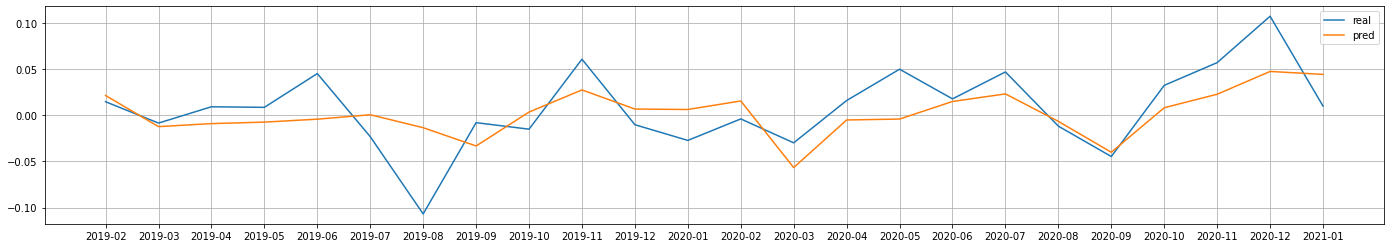

In [23]:
plt.figure(figsize=(ntest, 4))
plt.plot(testdates, y_test_nnr, label = "real")
plt.plot(testdates, meanpred_nnr, label = "pred")
plt.grid()
plt.legend()
plt.show()

In [24]:
pearson(y_test_nnr, meanpred_nnr)

0.6053584818723736

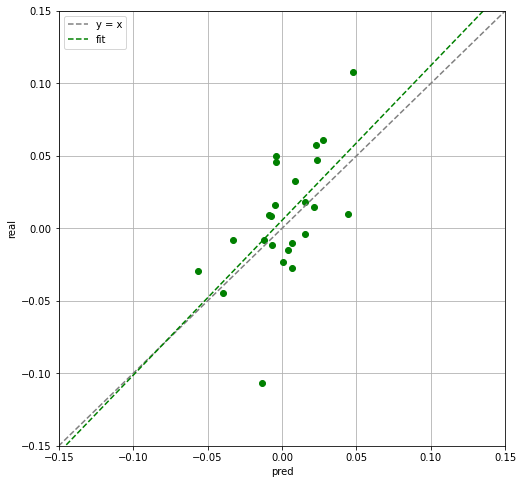

In [25]:
plt.figure(figsize=(8, 8))
plt.plot(meanpred_nnr, y_test_nnr, 'go')
plt.plot([-1,1], [-1,1], 'grey', ls = '--', label = 'y = x')
plt.plot([-1,1], np.poly1d(np.polyfit(meanpred_nnr, y_test_nnr,1))([-1,1]), 'g--', label = 'fit')
plt.xlabel('pred')
plt.ylabel('real')
plt.xlim(-0.15,0.15)
plt.ylim(-0.15,0.15)
plt.grid()
plt.legend()
plt.show()

# Part 2. 策略

In [26]:
RB = CommodityQuotation('RB', year_range)
RB.daily['month'] = RB.daily['trade_date'].dt.month
RB.daily['Open_dod'] = DOD(RB.daily.Open.values)
RB.daily.drop(columns = ['Open', 'High', 'Low', 'Close', 'Volume'], inplace = True)
RB.daily = RB.daily[RB.daily.trade_date >= pd.Timestamp(2019, 2, 1)]
RB.daily

,trade_date,year,month,Open_dod
1967,2019-02-01,2019,2,0.003802
1968,2019-02-11,2019,2,0.041667
1969,2019-02-12,2019,2,-0.008312
1970,2019-02-13,2019,2,-0.009953
1971,2019-02-14,2019,2,-0.018254
...,...,...,...,...
2440,2021-01-14,2021,1,-0.007176
2441,2021-01-15,2021,1,0.003730
2442,2021-01-18,2021,1,0.015099
2443,2021-01-19,2021,1,0.005034


In [27]:
predFrame = pd.DataFrame(pd.to_datetime(testdates)).rename({0:'date'}, axis = 1)
predFrame['year'] = predFrame.date.dt.year
predFrame['month'] = predFrame.date.dt.month
predFrame['pred'] = meanpred_nnr
predFrame['pred_pm'] = to_pm(meanpred_nnr)
predFrame

,date,year,month,pred,pred_pm
0,2019-02-01,2019,2,0.021664,1.0
1,2019-03-01,2019,3,-0.012130,-1.0
2,2019-04-01,2019,4,-0.008857,-1.0
3,2019-05-01,2019,5,-0.007238,-1.0
4,2019-06-01,2019,6,-0.004035,-1.0
5,2019-07-01,2019,7,0.000794,1.0
6,2019-08-01,2019,8,-0.013295,-1.0
7,2019-09-01,2019,9,-0.033139,-1.0
8,2019-10-01,2019,10,0.003687,1.0
9,2019-11-01,2019,11,0.027752,1.0


In [28]:
backT = RB.daily.merge(predFrame, on = ['year', 'month'])
btlength = backT.shape[0]
backT['RB_return'] = np.cumprod(np.repeat(1, btlength) +  backT.Open_dod)
backT.drop(columns = ['date'], inplace = True)
backT

,trade_date,year,month,Open_dod,pred,pred_pm,RB_return
0,2019-02-01,2019,2,0.003802,0.021664,1.0,1.003802
1,2019-02-11,2019,2,0.041667,0.021664,1.0,1.045627
2,2019-02-12,2019,2,-0.008312,0.021664,1.0,1.036936
3,2019-02-13,2019,2,-0.009953,0.021664,1.0,1.026616
4,2019-02-14,2019,2,-0.018254,0.021664,1.0,1.007876
...,...,...,...,...,...,...,...
473,2021-01-14,2021,1,-0.007176,0.044592,1.0,1.164856
474,2021-01-15,2021,1,0.003730,0.044592,1.0,1.169202
475,2021-01-18,2021,1,0.015099,0.044592,1.0,1.186855
476,2021-01-19,2021,1,0.005034,0.044592,1.0,1.192830


## 2.1. 策略一

月度环比预测为正即做多，预测为负即做空。杠杆率恒定为$1$。

In [29]:
backT['strat1_return'] = np.cumprod(np.repeat(1, btlength) + (backT.pred_pm * backT.Open_dod))
backT

,trade_date,year,month,Open_dod,pred,pred_pm,RB_return,strat1_return
0,2019-02-01,2019,2,0.003802,0.021664,1.0,1.003802,1.003802
1,2019-02-11,2019,2,0.041667,0.021664,1.0,1.045627,1.045627
2,2019-02-12,2019,2,-0.008312,0.021664,1.0,1.036936,1.036936
3,2019-02-13,2019,2,-0.009953,0.021664,1.0,1.026616,1.026616
4,2019-02-14,2019,2,-0.018254,0.021664,1.0,1.007876,1.007876
...,...,...,...,...,...,...,...,...
473,2021-01-14,2021,1,-0.007176,0.044592,1.0,1.164856,1.301128
474,2021-01-15,2021,1,0.003730,0.044592,1.0,1.169202,1.305982
475,2021-01-18,2021,1,0.015099,0.044592,1.0,1.186855,1.325700
476,2021-01-19,2021,1,0.005034,0.044592,1.0,1.192830,1.332374


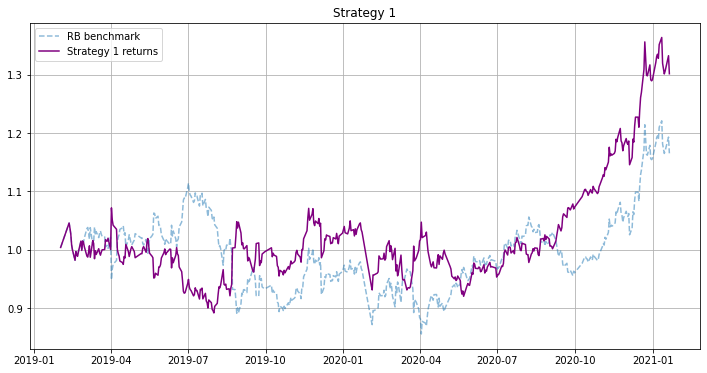

In [30]:
plt.figure(figsize = (12, 6))

plt.plot(backT.trade_date, backT.RB_return, '--', alpha = 0.5, label = "RB benchmark")
plt.plot(backT.trade_date, backT.strat1_return, 'purple', label = "Strategy 1 returns")
plt.title('Strategy 1')
plt.grid()
plt.legend()
plt.show()

## 2.2. 策略二

月度环比预测为正即做多，预测为负即做空，杠杆率为$50\times$预测值绝对值。

例：若月度环比预测为$0.02$，则杠杆率为$1$。若月度环比预测为$-0.04$，则杠杆率为$2$。

In [31]:
backT['strat2_return'] = np.cumprod(np.repeat(1, btlength) + (50 * backT.pred * backT.Open_dod))
backT

,trade_date,year,month,Open_dod,pred,pred_pm,RB_return,strat1_return,strat2_return
0,2019-02-01,2019,2,0.003802,0.021664,1.0,1.003802,1.003802,1.004119
1,2019-02-11,2019,2,0.041667,0.021664,1.0,1.045627,1.045627,1.049439
2,2019-02-12,2019,2,-0.008312,0.021664,1.0,1.036936,1.036936,1.039990
3,2019-02-13,2019,2,-0.009953,0.021664,1.0,1.026616,1.026616,1.028778
4,2019-02-14,2019,2,-0.018254,0.021664,1.0,1.007876,1.007876,1.008436
...,...,...,...,...,...,...,...,...,...
473,2021-01-14,2021,1,-0.007176,0.044592,1.0,1.164856,1.301128,1.796593
474,2021-01-15,2021,1,0.003730,0.044592,1.0,1.169202,1.305982,1.811536
475,2021-01-18,2021,1,0.015099,0.044592,1.0,1.186855,1.325700,1.872520
476,2021-01-19,2021,1,0.005034,0.044592,1.0,1.192830,1.332374,1.893538


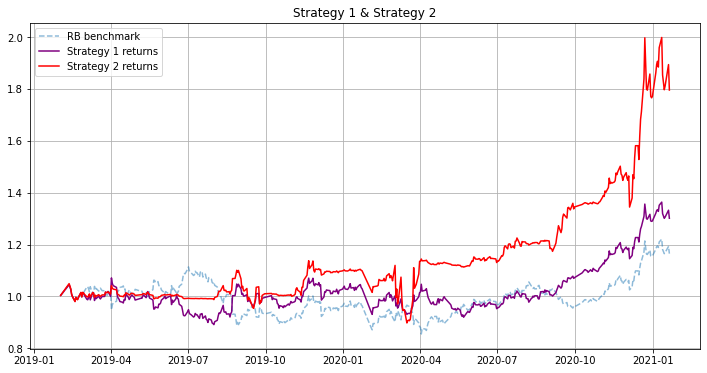

In [32]:
plt.figure(figsize = (12, 6))

plt.plot(backT.trade_date, backT.RB_return, '--', alpha = 0.5, label = "RB benchmark")
plt.plot(backT.trade_date, backT.strat1_return, 'purple', label = "Strategy 1 returns")
plt.plot(backT.trade_date, backT.strat2_return, 'red', label = "Strategy 2 returns")
plt.title('Strategy 1 & Strategy 2')
plt.grid()
plt.legend()
plt.show()